# Subdistrict Exploratory Data Analysis

# Environment & Data

We prepare the enviromnet for EDA and load the created subdistrict master table (including scraped POIs)

In [4]:
# Bootstrap
import sys, os
import pandas as pd
import numpy as np

# Add repo root to path so imports work
sys.path.append(os.path.abspath(os.path.join("..", "..")))

from berlin_housing import config

# Vizualization settings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_palette("colorblind")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# Load subdistrict master table
ortsteil_master = pd.read_csv(os.path.join(config.PROCESSED_DIR, "ortsteil_master_with_poi.csv"))

In [6]:
# --- Handy column groups ---
age_cols = [
    'subdistrict_population_age_0_5','subdistrict_population_age_5_10','subdistrict_population_age_10_15',
    'subdistrict_population_age_15_20','subdistrict_population_age_20_25','subdistrict_population_age_25_30',
    'subdistrict_population_age_30_35','subdistrict_population_age_35_40','subdistrict_population_age_40_45',
    'subdistrict_population_age_45_50','subdistrict_population_age_50_55','subdistrict_population_age_55_60',
    'subdistrict_population_age_60_65','subdistrict_population_age_65_70','subdistrict_population_age_70_75',
    'subdistrict_population_age_75_80','subdistrict_population_age_80_85','subdistrict_population_age_85_90',
    'subdistrict_population_age_90_95','subdistrict_population_age_95_plus'
]

gender_cols = ['subdistrict_male_population','subdistrict_female_population']
demo_cols = age_cols + gender_cols + [
    'total_population','subdistrict_senior_population','subdistrict_youth_population',
    'subdistrict_senior_share','subdistrict_youth_share','subdistrict_middle_age_population'
]

rent_income_cols = ['subdistrict_avg_median_income_eur','subdistrict_avg_mietspiegel_classification',
                    'classification_category']

employment_cols = ['subdistrict_total_full_time_employees']

poi_cols = [
    'alcohol','animal_training','antiques','art','bar','bathing_place','books','butcher','childcare','clothes',
    'community_centre','confectionery','convenience','deli','dog_park','electronics','fitness_station','florist',
    'fountain','games','garden','greenfield','greengrocer','hairdresser','ice_cream','kiosk','marina',
    'nature_reserve','nightclub','parking','pitch','playground','restaurant','second_hand','stationery','supermarket',
    'theatre','travel_agency','vacant','wine','yes','cafes','bakeries','green_space','schools','medical'
]

id_cols = ['bezirk','ortsteil']

# Data Overview

In [7]:
ortsteil_master.head()

,bezirk,ortsteil,subdistrict_population_age_0_5,subdistrict_population_age_5_10,subdistrict_population_age_10_15,subdistrict_population_age_15_20,subdistrict_population_age_20_25,subdistrict_population_age_25_30,subdistrict_population_age_30_35,subdistrict_population_age_35_40,subdistrict_population_age_40_45,subdistrict_population_age_45_50,subdistrict_population_age_50_55,subdistrict_population_age_55_60,subdistrict_population_age_60_65,subdistrict_population_age_65_70,subdistrict_population_age_70_75,subdistrict_population_age_75_80,subdistrict_population_age_80_85,subdistrict_population_age_85_90,subdistrict_population_age_90_95,subdistrict_population_age_95_plus,subdistrict_male_population,subdistrict_female_population,total_population,subdistrict_senior_population,subdistrict_youth_population,subdistrict_senior_share,subdistrict_youth_share,subdistrict_middle_age_population,Unnamed: 0,subdistrict_avg_mietspiegel_classification,subdistrict_total_full_time_employees,subdistrict_avg_median_income_eur,classification_category,alcohol,animal_training,antiques,art,bar,bathing_place,books,butcher,childcare,clothes,community_centre,confectionery,convenience,deli,dog_park,electronics,fitness_station,florist,fountain,games,garden,greenfield,greengrocer,hairdresser,ice_cream,kiosk,marina,nature_reserve,nightclub,parking,pitch,playground,restaurant,second_hand,stationery,supermarket,theatre,travel_agency,vacant,wine,yes,cafes,bakeries,green_space,schools,medical
0,treptow-koepenick,adlershof,1177.0,846.0,710.0,671.0,1410.0,1765.0,2274.0,1833.0,1349.0,1044.0,1235.0,1384.0,991.0,833.0,607.0,764.0,762.0,383.0,150.0,22.0,10200,10010,20210,3521.0,3404.0,0.174221,0.168431,0.657348,81,1.806202,428667.0,4388.000000,moderate,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,33,0,0,10,0,0,0,0,1,11,1,215,17,8
1,lichtenberg,alt-hohenschoenhausen,2960.0,2689.0,2308.0,1975.0,2360.0,2943.0,4609.0,3963.0,3415.0,2776.0,3122.0,3530.0,2956.0,2891.0,2392.0,2175.0,1729.0,869.0,344.0,64.0,24655,25415,50070,10464.0,9932.0,0.208987,0.198362,0.592650,9,1.523013,4613178.0,3757.875000,moderate,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82,20,0,0,14,0,0,0,0,0,9,0,375,38,8
2,treptow-koepenick,alt-treptow,840.0,727.0,560.0,450.0,457.0,895.0,1617.0,1685.0,1394.0,975.0,926.0,815.0,506.0,339.0,252.0,284.0,230.0,146.0,59.0,10.0,6579,6588,13167,1320.0,2577.0,0.100251,0.195717,0.704033,82,2.306122,193648.0,3998.000000,moderate,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,15,18,0,0,7,0,0,0,0,0,13,1,183,13,5
3,treptow-koepenick,altglienicke,1724.0,1788.0,1631.0,1391.0,1417.0,1411.0,2162.0,2134.0,1973.0,1876.0,2398.0,2699.0,1960.0,1424.0,1043.0,1056.0,901.0,420.0,156.0,31.0,14638,14957,29595,5031.0,6534.0,0.169995,0.220781,0.609225,83,1.500000,142688.0,4138.000000,moderate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,12,0,0,9,1,0,0,0,0,2,1,286,22,3
4,treptow-koepenick,baumschulenweg,880.0,732.0,620.0,569.0,866.0,1374.0,2107.0,1669.0,1227.0,962.0,1235.0,1333.0,915.0,749.0,569.0,775.0,1257.0,744.0,238.0,73.0,9070,9824,18894,4405.0,2801.0,0.233143,0.148248,0.618609,84,1.690141,0.0,3955.611111,moderate,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,9,0,0,3,0,0,0,0,0,5,0,62,14,3


In [8]:
print("Rows and Columns: ", ortsteil_master.shape)
ortsteil_master.info()

Rows and Columns:  (96, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 81 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   bezirk                                      96 non-null     object 
 1   ortsteil                                    96 non-null     object 
 2   subdistrict_population_age_0_5              96 non-null     float64
 3   subdistrict_population_age_5_10             96 non-null     float64
 4   subdistrict_population_age_10_15            96 non-null     float64
 5   subdistrict_population_age_15_20            96 non-null     float64
 6   subdistrict_population_age_20_25            96 non-null     float64
 7   subdistrict_population_age_25_30            96 non-null     float64
 8   subdistrict_population_age_30_35            96 non-null     float64
 9   subdistrict_population_age_35_40            96 non-null     f

# Distribution

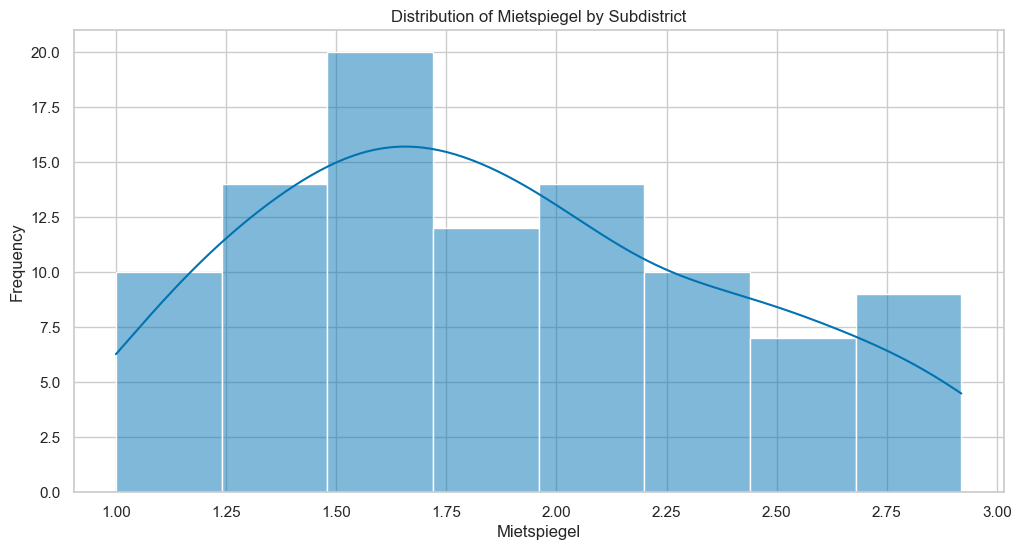

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(ortsteil_master["subdistrict_avg_mietspiegel_classification"], kde=True)
plt.title("Distribution of Mietspiegel by Subdistrict")
plt.xlabel("Mietspiegel")
plt.ylabel("Frequency")
plt.show()

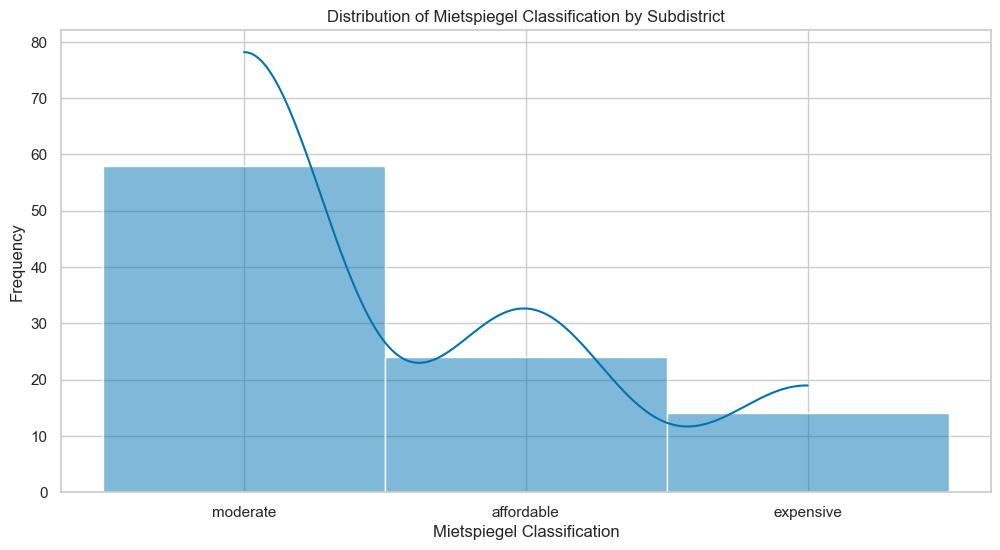

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(ortsteil_master["classification_category"], kde=True)
plt.title("Distribution of Mietspiegel Classification by Subdistrict")
plt.xlabel("Mietspiegel Classification")
plt.ylabel("Frequency")
plt.show()

# Subdistrict Population

Text(0, 0.5, '')

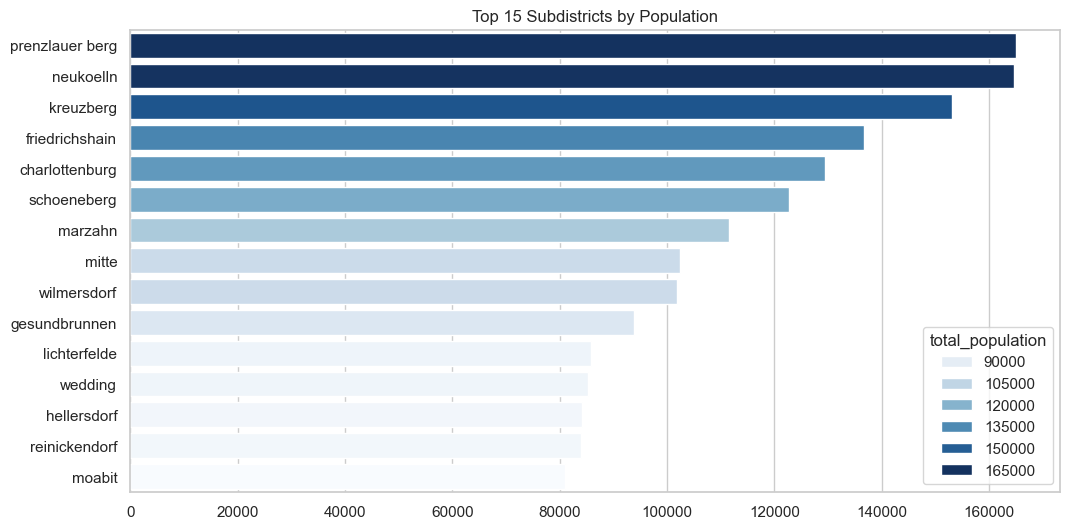

In [11]:
# Top 15 subdistricts by population
ortsteil_population = ortsteil_master.groupby("ortsteil")["total_population"].sum().reset_index()
ortsteil_population = ortsteil_population.sort_values(by="total_population", ascending=False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x="total_population", y="ortsteil", data=ortsteil_population, hue="total_population", palette="Blues")
plt.title("Top 15 Subdistricts by Population")
plt.xlabel("")
plt.ylabel("")

Prenzlauer Berg and Neuköln are the subdistrict with the highest total population, closely followed by Kreuzberg.

Text(0, 0.5, '')

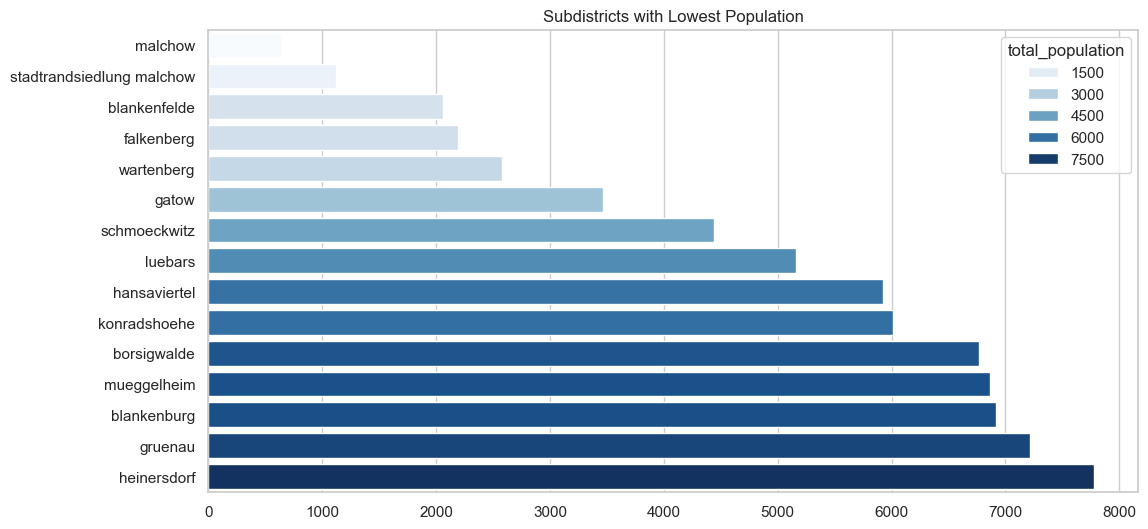

In [12]:
# top 15 subdistricts by population ascending
ortsteil_population = ortsteil_master.groupby("ortsteil")["total_population"].sum().reset_index()
ortsteil_population = ortsteil_population.sort_values(by="total_population", ascending=True).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x="total_population", y="ortsteil", data=ortsteil_population, hue="total_population", palette="Blues")
plt.title("Subdistricts with Lowest Population")
plt.xlabel("")
plt.ylabel("")

Malchow is the subdistrict with the smalles population below 1000 people. 

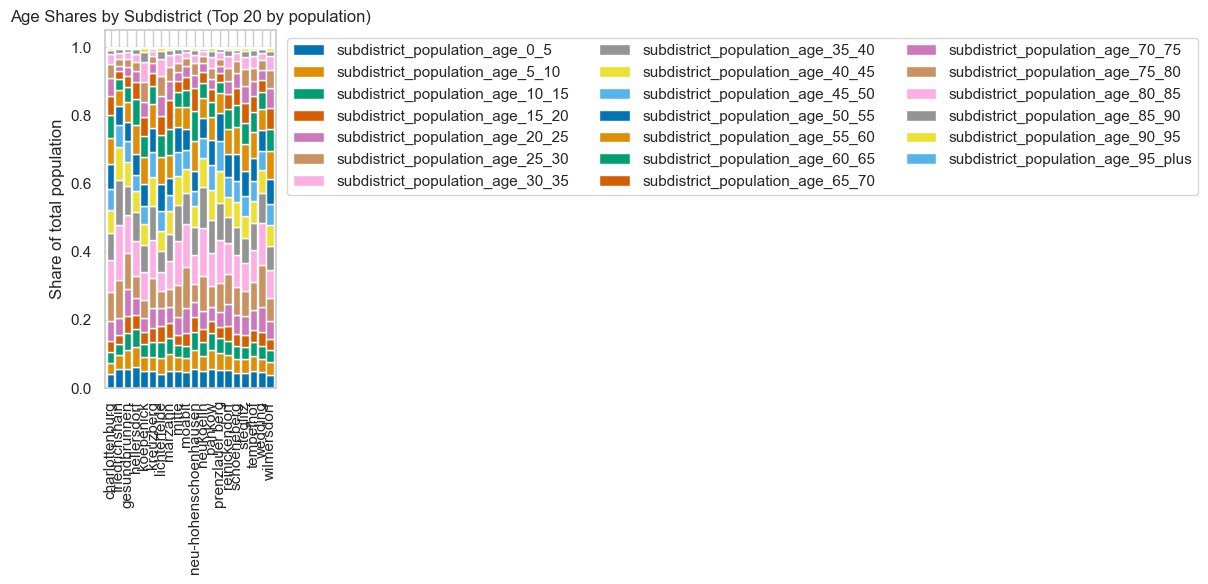

In [13]:
age_long = (
    ortsteil_master[id_cols + ['total_population'] + age_cols]
      .assign(total_population=lambda d: d['total_population'].replace(0, np.nan))
      .melt(id_vars=id_cols + ['total_population'], value_vars=age_cols,
            var_name='age_band', value_name='count')
      .assign(share=lambda d: d['count'] / d['total_population'])
)

# Stacked share by ortsteil (top N by population for readability)
topN = (ortsteil_master[['ortsteil','total_population']]
        .sort_values('total_population', ascending=False).head(20)['ortsteil'])
plot_data = age_long[age_long['ortsteil'].isin(topN)]

# Order age bands naturally
age_order = age_cols

pivot_share = (plot_data
               .pivot_table(index='ortsteil', columns='age_band', values='share', aggfunc='sum')
               [age_order]
               .fillna(0))

pivot_share.plot(kind='bar', stacked=True, figsize=(12,6), width=0.9)
plt.title('Age Shares by Subdistrict (Top 20 by population)')
plt.xlabel('')
plt.ylabel('Share of total population')
plt.legend(ncol=3, bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

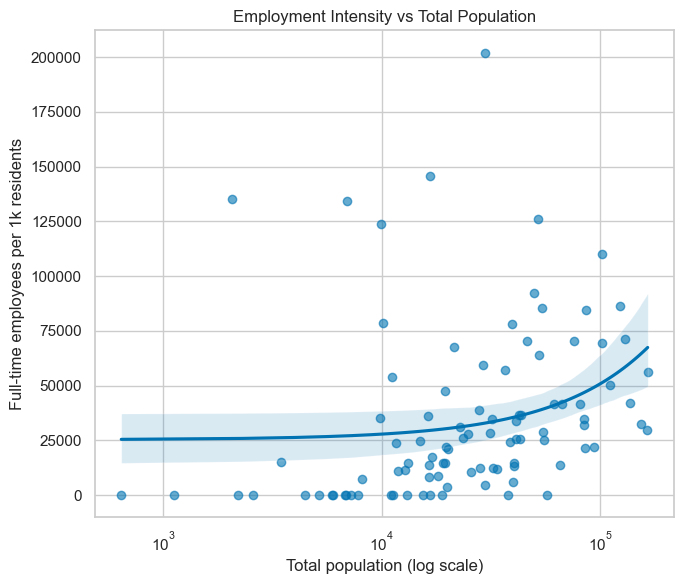

In [14]:
tmp = ortsteil_master[ortsteil_master['total_population']>0].copy()
tmp['employees_per_1k'] = 1000 * tmp['subdistrict_total_full_time_employees'] / tmp['total_population']

plt.figure(figsize=(7,6))
sns.regplot(data=tmp, x='total_population', y='employees_per_1k', scatter_kws={'alpha':0.6})
plt.xscale('log')
plt.title('Employment Intensity vs Total Population')
plt.xlabel('Total population (log scale)')
plt.ylabel('Full-time employees per 1k residents')
plt.tight_layout()
plt.show()

# Subdistrict Rent, Income & Mietspiegel

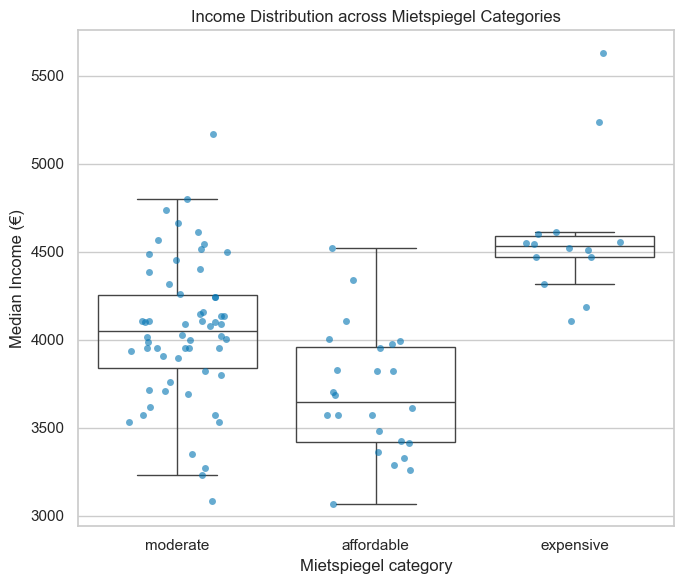

In [15]:
# Using Mietspiegel classification (ordinal) vs income:
plt.figure(figsize=(7,6))
sns.stripplot(data=ortsteil_master, x='classification_category', y='subdistrict_avg_median_income_eur', jitter=0.25, alpha=0.6)
sns.boxplot(data=ortsteil_master, x='classification_category', y='subdistrict_avg_median_income_eur',
            showcaps=True, boxprops={'facecolor':'none'}, showfliers=False, whis=1.5)
plt.title('Income Distribution across Mietspiegel Categories')
plt.xlabel('Mietspiegel category')
plt.ylabel('Median Income (€)')
plt.tight_layout()
plt.show()

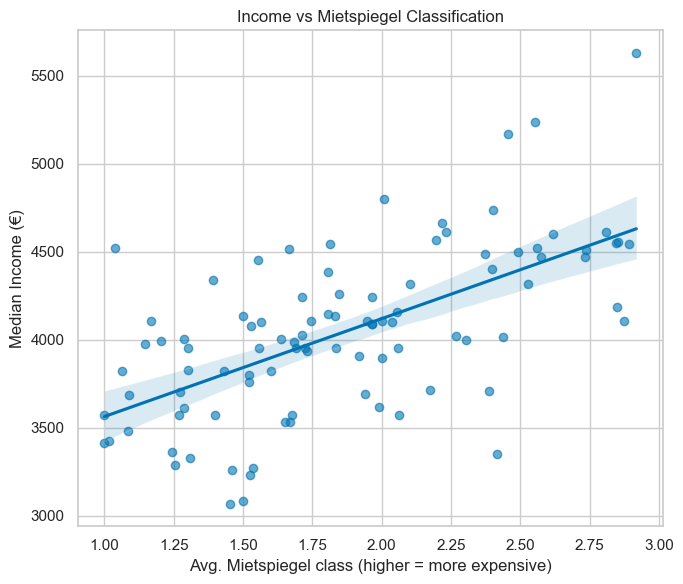

In [16]:
plt.figure(figsize=(7,6))
sns.regplot(data=ortsteil_master, x='subdistrict_avg_mietspiegel_classification',
            y='subdistrict_avg_median_income_eur', scatter_kws={'alpha':0.6})
plt.title('Income vs Mietspiegel Classification')
plt.xlabel('Avg. Mietspiegel class (higher = more expensive)')
plt.ylabel('Median Income (€)')
plt.tight_layout()
plt.show()

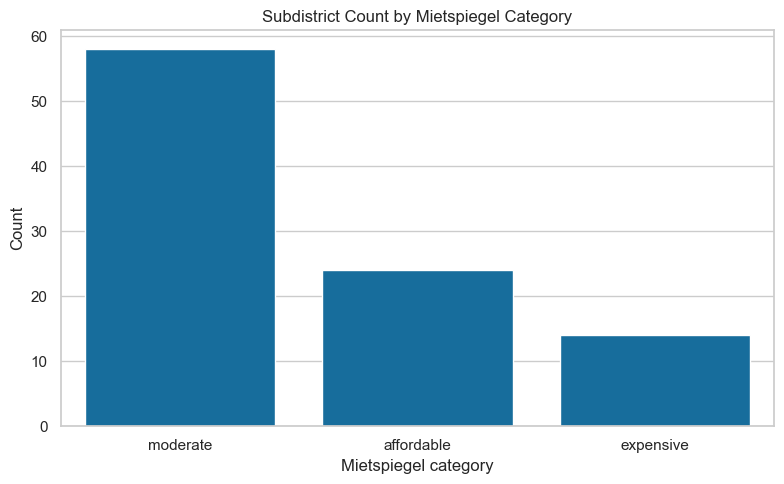

In [17]:
plt.figure(figsize=(8,5))
order = ortsteil_master['classification_category'].value_counts().index
sns.countplot(data=ortsteil_master, x='classification_category', order=order)
plt.title('Subdistrict Count by Mietspiegel Category')
plt.xlabel('Mietspiegel category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Subdistrict POIs

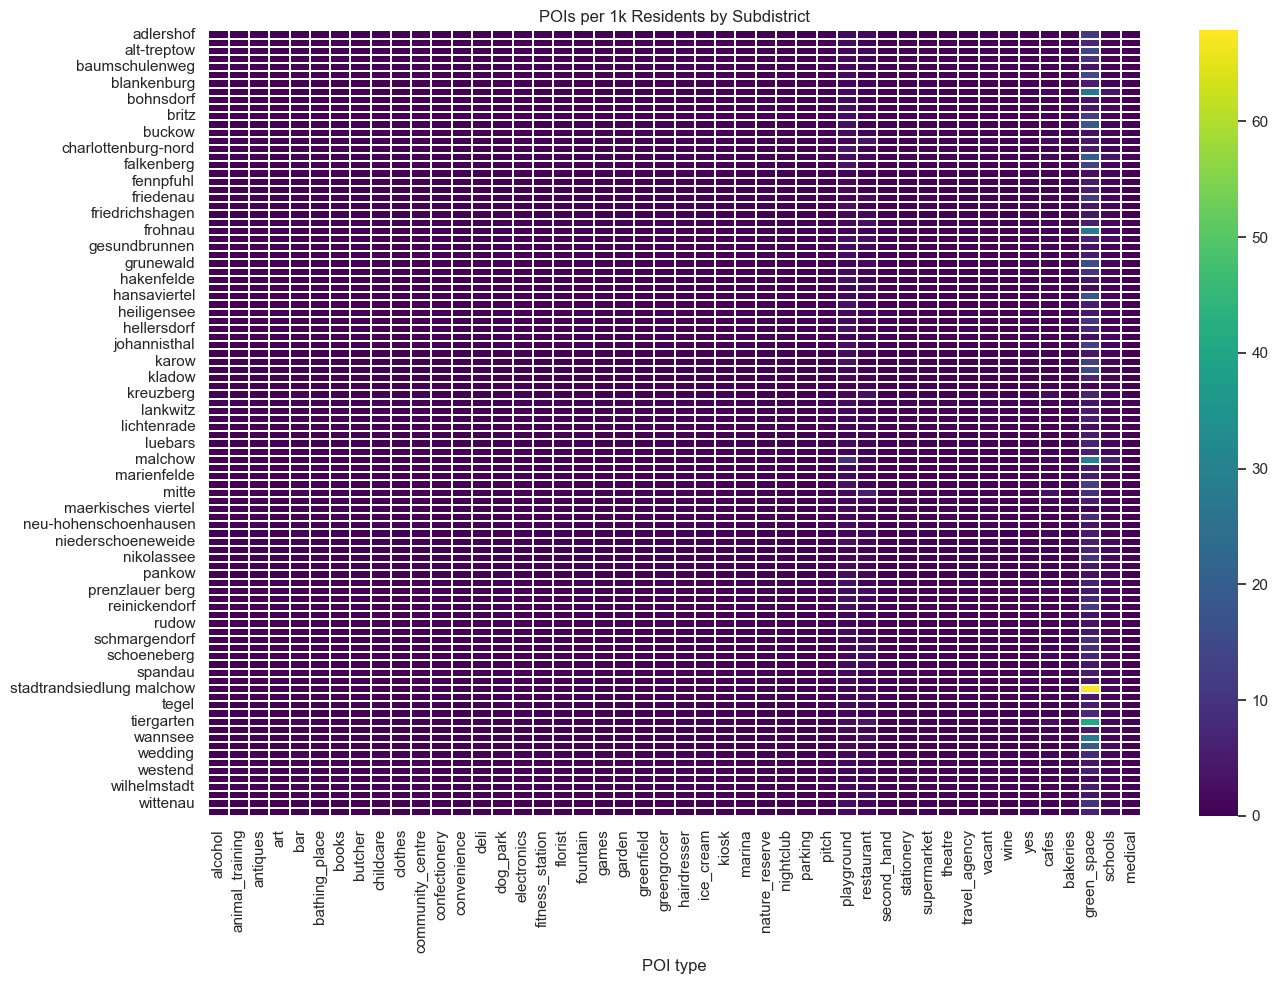

In [18]:
poi_per_1k = ortsteil_master[id_cols + ['total_population'] + poi_cols].copy()
poi_per_1k['total_population'] = poi_per_1k['total_population'].replace(0, np.nan)

for c in poi_cols:
    poi_per_1k[c] = 1000 * poi_per_1k[c] / poi_per_1k['total_population']

heat = (poi_per_1k
        .set_index('ortsteil')[poi_cols]
        .fillna(0))

plt.figure(figsize=(14,10))
sns.heatmap(heat, cmap='viridis', linewidths=.2)
plt.title('POIs per 1k Residents by Subdistrict')
plt.xlabel('POI type')
plt.ylabel('')
plt.tight_layout()
plt.show()

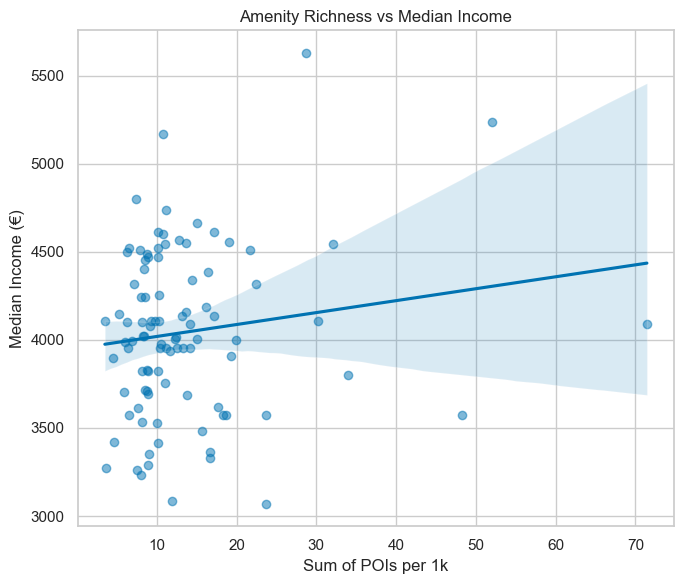

In [19]:
tmp = poi_per_1k.copy()
tmp['amenity_richness'] = tmp[poi_cols].sum(axis=1)

plt.figure(figsize=(7,6))
sns.regplot(data=tmp.merge(ortsteil_master[id_cols + rent_income_cols], on=id_cols),
            x='amenity_richness', y='subdistrict_avg_median_income_eur', scatter_kws={'alpha':0.5})
plt.title('Amenity Richness vs Median Income')
plt.xlabel('Sum of POIs per 1k')
plt.ylabel('Median Income (€)')
plt.tight_layout()
plt.show()

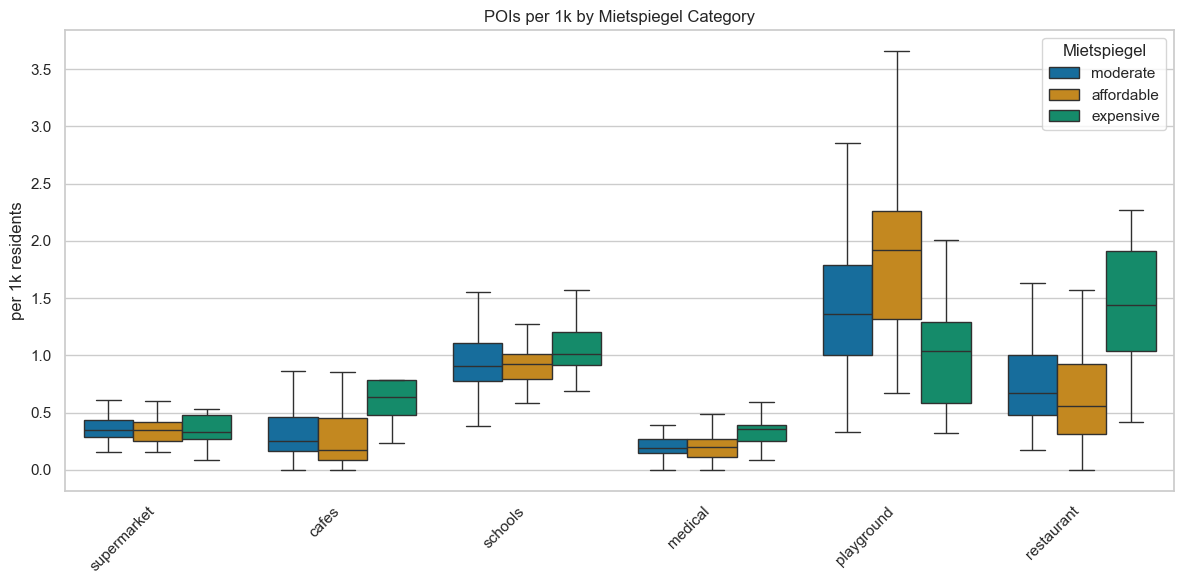

In [20]:
sel = ['supermarket','cafes','schools','medical','playground','restaurant']
long = (poi_per_1k[id_cols + sel]
        .merge(ortsteil_master[id_cols + ['classification_category']], on=id_cols)
        .melt(id_vars=id_cols + ['classification_category'], var_name='poi', value_name='per_1k'))

plt.figure(figsize=(12,6))
sns.boxplot(data=long, x='poi', y='per_1k', hue='classification_category', showfliers=False)
plt.title('POIs per 1k by Mietspiegel Category')
plt.xlabel('')
plt.ylabel('per 1k residents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Mietspiegel')
plt.tight_layout()
plt.show()

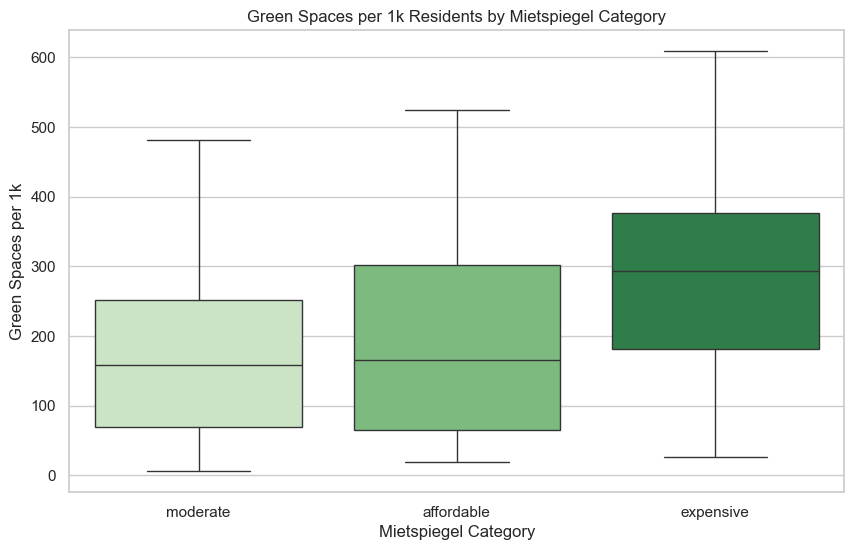

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=ortsteil_master,
    x='classification_category',   # Mietspiegel classes on x-axis
    y='green_space',               # number of green spaces per 1k (already normalized)
    showfliers=False,
    hue='classification_category',
    palette='Greens'
)
plt.title('Green Spaces per 1k Residents by Mietspiegel Category')
plt.xlabel('Mietspiegel Category')
plt.ylabel('Green Spaces per 1k')
plt.show()

# Patterns & Correlation

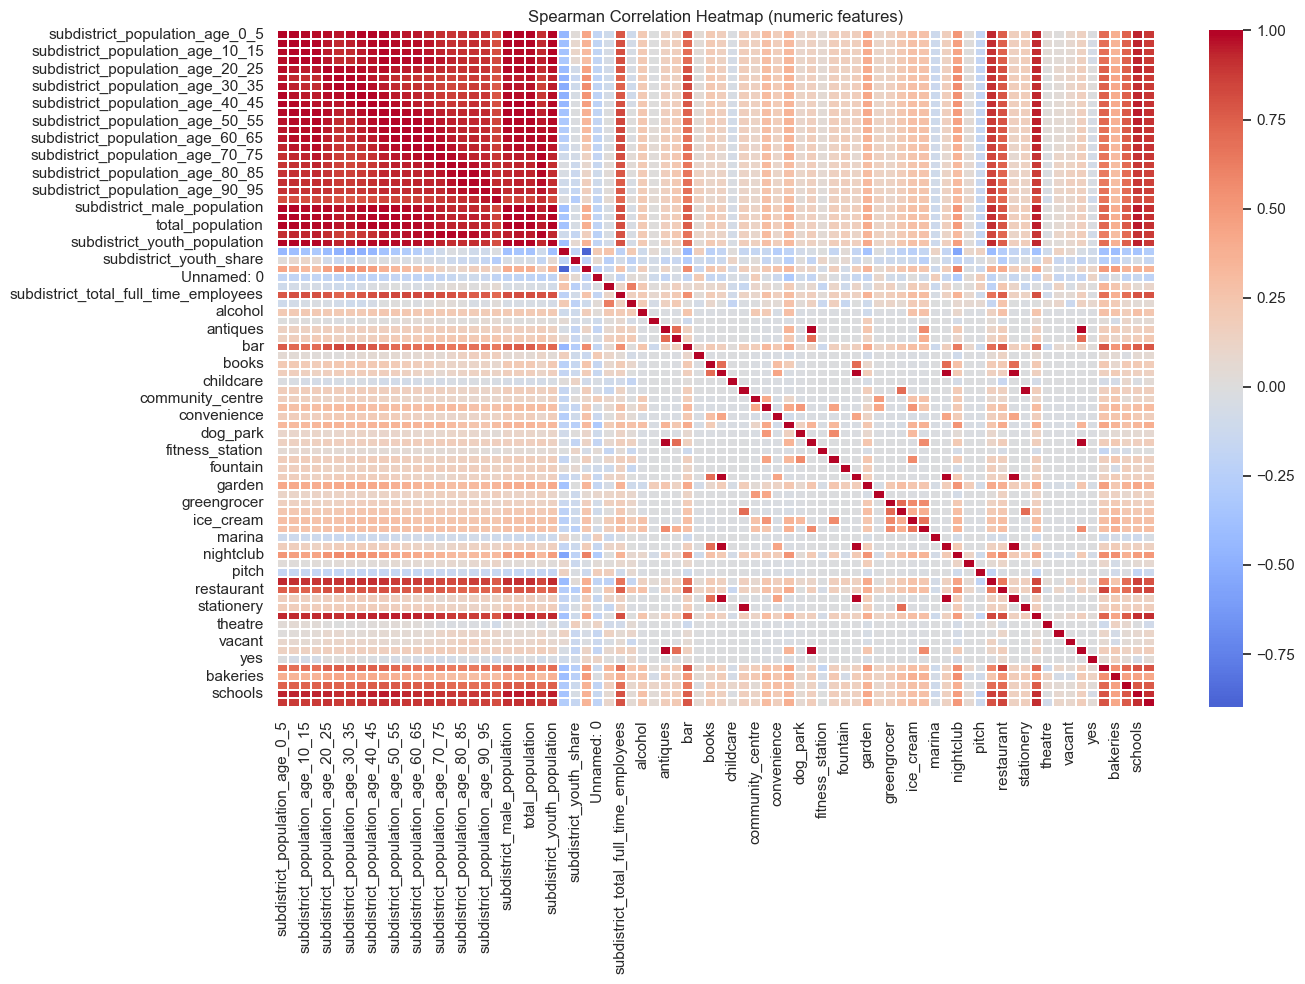

In [22]:
num_cols = [c for c in ortsteil_master.columns if ortsteil_master[c].dtype != 'O']  # numeric only
corr = ortsteil_master[num_cols].corr(method='spearman')

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=.2)
plt.title('Spearman Correlation Heatmap (numeric features)')
plt.tight_layout()
plt.show()

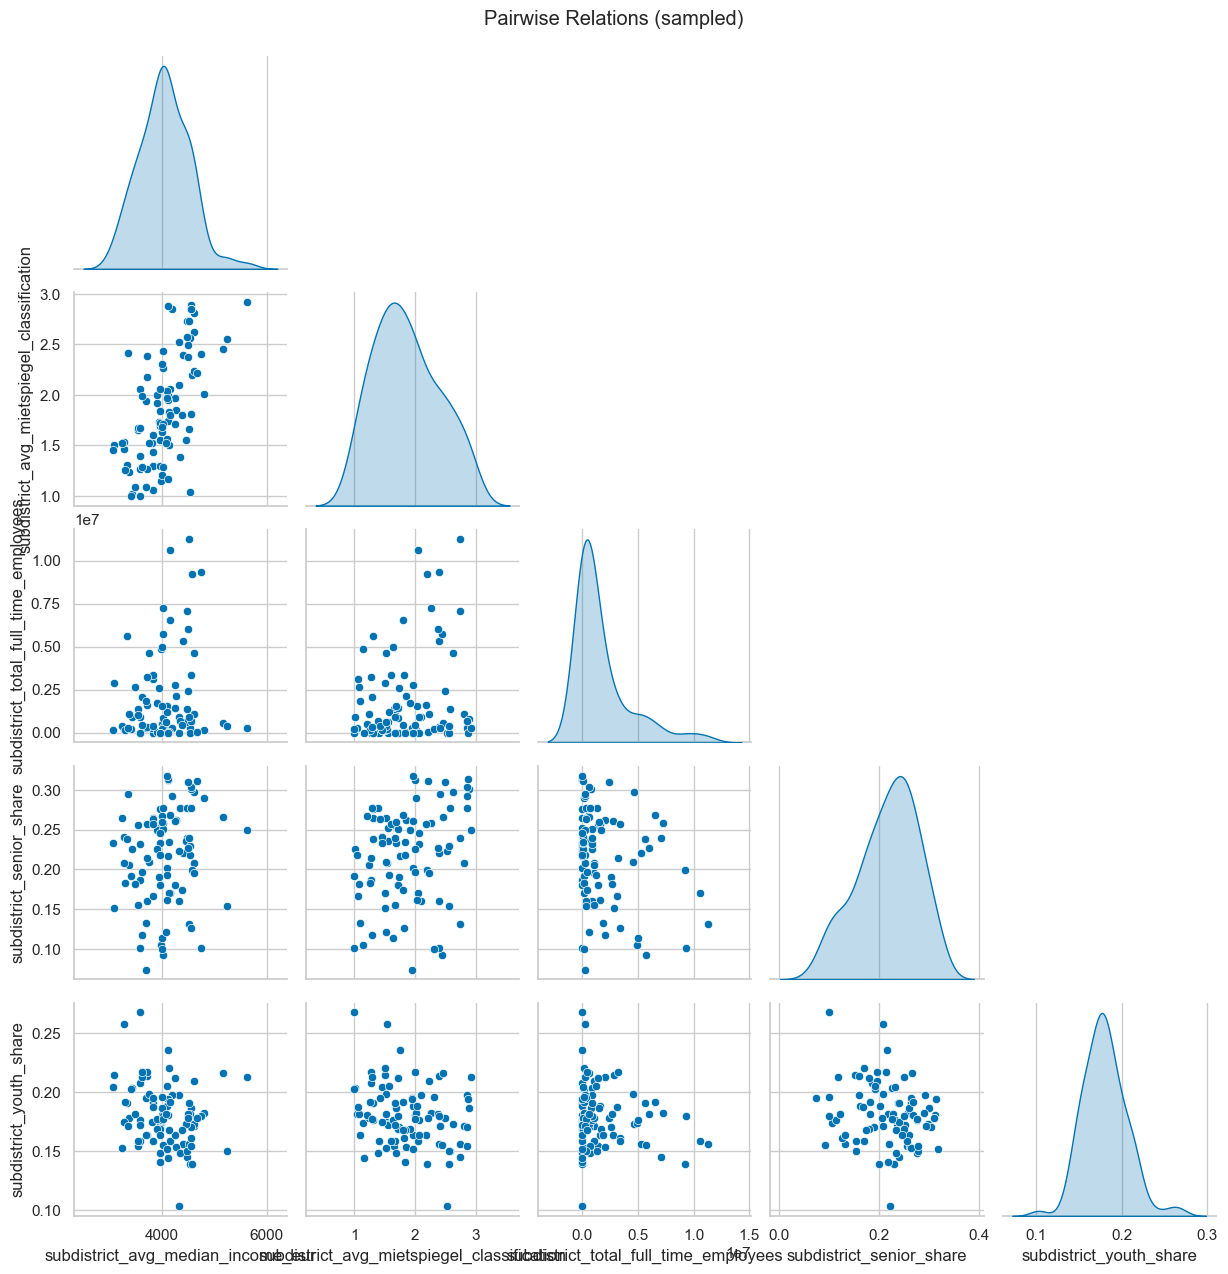

In [23]:
cols_of_interest = [
    'subdistrict_avg_median_income_eur',
    'subdistrict_avg_mietspiegel_classification',
    'subdistrict_total_full_time_employees',
    'subdistrict_senior_share','subdistrict_youth_share'
]
sns.pairplot(ortsteil_master[cols_of_interest].sample(min(300, len(ortsteil_master))), diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relations (sampled)', y=1.02)
plt.show()

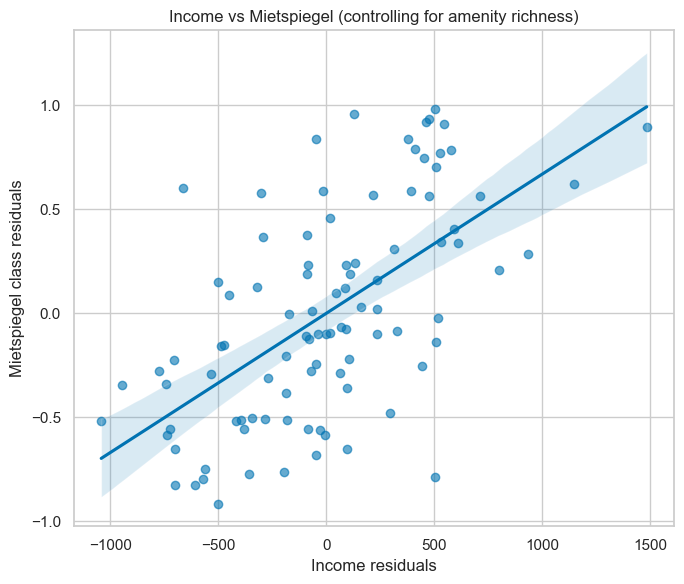

In [24]:
# Effect of income on Mietspiegel after controlling for amenity richness
Z = (poi_per_1k[poi_cols].fillna(0).sum(axis=1)).to_frame('amenity_richness')
XY = ortsteil_master[['subdistrict_avg_median_income_eur','subdistrict_avg_mietspiegel_classification']].copy()
XY = XY.join(Z.set_index(ortsteil_master.index))

# Demean by amenity richness using simple linear fits
from sklearn.linear_model import LinearRegression
mX = LinearRegression().fit(XY[['amenity_richness']], XY['subdistrict_avg_median_income_eur'])
mY = LinearRegression().fit(XY[['amenity_richness']], XY['subdistrict_avg_mietspiegel_classification'])
res_income = XY['subdistrict_avg_median_income_eur'] - mX.predict(XY[['amenity_richness']])
res_miet   = XY['subdistrict_avg_mietspiegel_classification'] - mY.predict(XY[['amenity_richness']])

plt.figure(figsize=(7,6))
sns.regplot(x=res_income, y=res_miet, scatter_kws={'alpha':0.6})
plt.title('Income vs Mietspiegel (controlling for amenity richness)')
plt.xlabel('Income residuals')
plt.ylabel('Mietspiegel class residuals')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Employees per 1k')

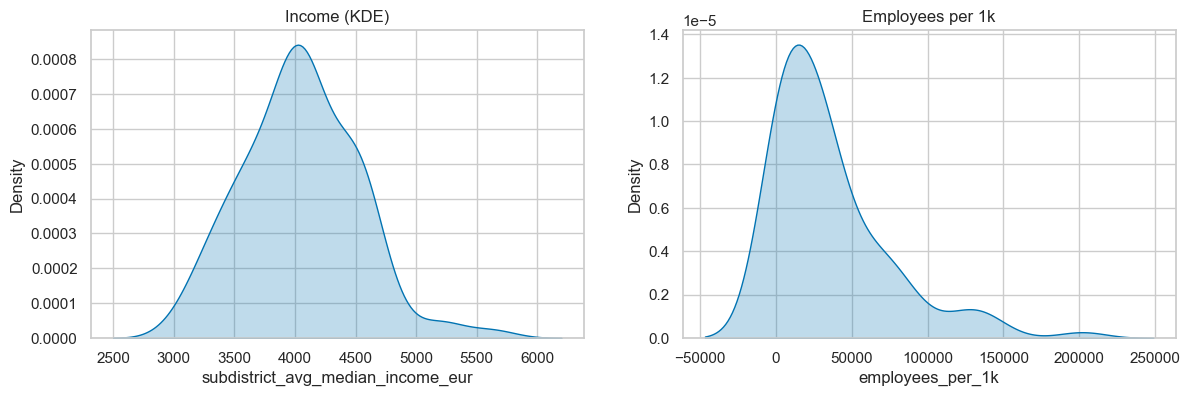

In [25]:
tmp = ortsteil_master.copy()
tmp = tmp[tmp['total_population']>0]
tmp['employees_per_1k'] = 1000 * tmp['subdistrict_total_full_time_employees'] / tmp['total_population']

fig, axes = plt.subplots(1,2, figsize=(14,4))
sns.kdeplot(data=tmp, x='subdistrict_avg_median_income_eur', ax=axes[0], fill=True)
axes[0].set_title('Income (KDE)')

sns.kdeplot(data=tmp, x='employees_per_1k', ax=axes[1], fill=True)
axes[1].set_title('Employees per 1k')



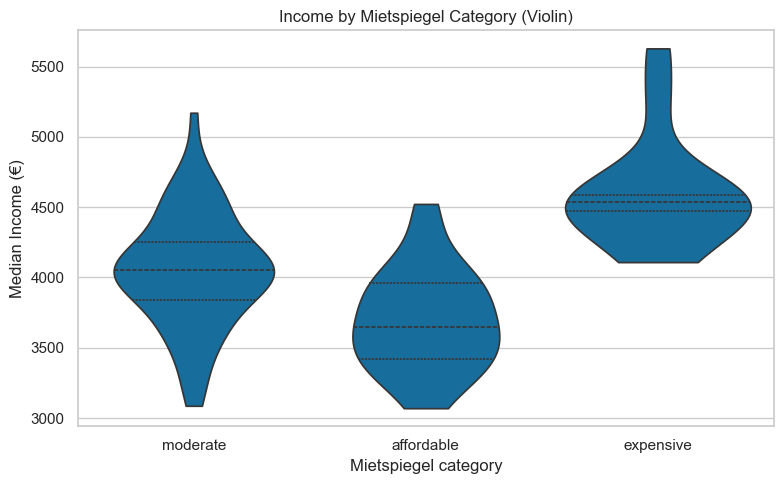

In [26]:
plt.figure(figsize=(8,5))
sns.violinplot(data=ortsteil_master, x='classification_category', y='subdistrict_avg_median_income_eur', inner='quartile', cut=0)
plt.title('Income by Mietspiegel Category (Violin)')
plt.xlabel('Mietspiegel category'); plt.ylabel('Median Income (€)')
plt.tight_layout(); plt.show()

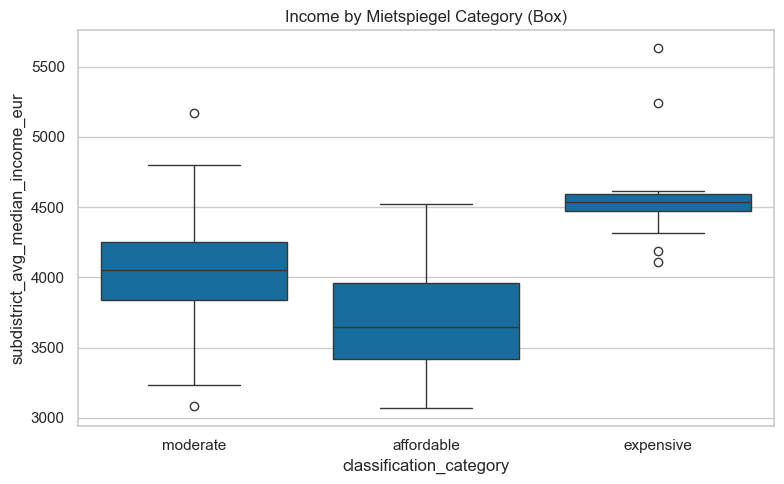

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(data=ortsteil_master, x='classification_category', y='subdistrict_avg_median_income_eur', showfliers=True)
plt.title('Income by Mietspiegel Category (Box)')
plt.tight_layout(); plt.show()